# Лабораторная работа №4. Выделение контуров на изображениях

Вариант №10

Выполнил: Гершевский Егор

Группа: 6131-010402D

Для свертки использовать написанную ранее в ЛР2 функцию, по необходимость дописать её для работы с масками с четной размерностью.

1. Считать цветное rgb изображение. Преобразовать в градации серого.

2. Сделать выделение контуров методом простого градиента. В качестве значения модуля градиента использовать указанный в вариантах метод. 
  *   Вход: изображение из пункта 1
  *   Вывод: бинарное изображение с контурами
3. Сделать выделение контуров методом по вариантам.  
  *   Вход: изображение из пункта 1
  *   Вывод: бинарное изображение с контурами

4. Сделать выделение контуров методом с согласованием. Тип функции аппроксимации и размер окна указан по вариантам. 
  *   Вход: изображение из пункта 1
  *   Вывод: бинарное изображение с контурами

    
*Для работы с изображением использовать OpenCV (открытие, сохранение и т.д.). Для визуализации можно использовать matplotlib. Все необходимые для задания функции реализовавать самим, а не использовать готовые в OpenCV, если не указано обратного.*

№ варианта | Задание 2 | Задание 3 | Задание 4 
--- | :---: | :---:  | :---:
10 | модуль градиента аппроксимируется суммой модулей производных | Оператор Собеля  |  Аппроксимация поверхностью 2-го порядка, окно 3x3

In [1]:
from itertools import product
from warnings import filterwarnings

import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from matplotlib.pyplot import *
from tqdm.notebook import tqdm

filterwarnings("ignore")
%matplotlib inline

In [2]:
def show_image(image):
    """Функция для вывода изображения."""
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) if len(
        image.shape) == 3 else plt.imshow(image, cmap='gray')

In [3]:
def convolution(image, kernel):
    """Функция свертки."""
    __kernel = np.flipud(np.fliplr(kernel))
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape
    output_image = np.zeros((image_rows, image_cols))

    if kernel_cols % 2 == 0:
        output_image_cols = image_cols + (kernel_cols // 2)
        copy_cols = (0, image_cols)
    else:
        output_image_cols = image_cols + 2 * (kernel_cols // 2)
        copy_cols = (kernel_cols // 2, output_image_cols - (kernel_cols // 2))

    if kernel_rows % 2 == 0:
        output_image_rows = image_rows + (kernel_rows // 2)
        copy_rows = (0, image_rows)
    else:
        output_image_rows = image_rows + 2 * (kernel_rows // 2)
        copy_rows = (kernel_rows // 2, output_image_rows - (kernel_rows // 2))

    img = np.zeros((output_image_rows, output_image_cols))
    img[copy_rows[0]: copy_rows[1], copy_rows[0]: copy_cols[1]] = image

    for i, j in tqdm(np.ndindex((image_rows, image_cols))):
        output_image[i, j] = np.sum(
            __kernel * img[i: i + kernel_rows, j: j + kernel_cols])

    clear_output()
    return output_image

In [4]:
def grayscale_image(image):
    """Функция для преобразования в градации серого."""
    return (np.dot(image[..., :3], np.array([0.2126, 0.7152, 0.0722]))).astype(np.uint8)

In [5]:
def threshold_processing(grayscale_image, threshold):
    """Функция пороговой обработки."""
    return np.vectorize(lambda x: 1 if x > threshold else 0)(grayscale_image).astype(np.uint8)

# Задание 1.

Считать цветное rgb изображение. Преобразовать в градации серого.

Исходное изображение:


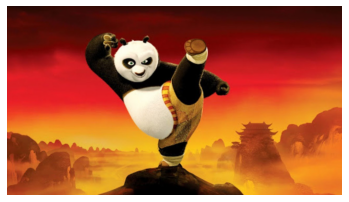

In [6]:
image = cv2.imread('../images/po.jpg')
print('Исходное изображение:')
show_image(image)

Преобразованное изображение в градации серого:


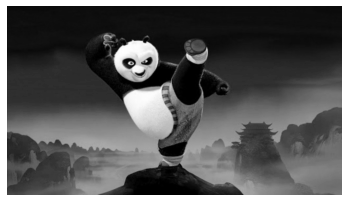

In [7]:
print('Преобразованное изображение в градации серого:')
gray_img = grayscale_image(image)
show_image(gray_img)

# Задание 2.

Сделать выделение контуров методом простого градиента. В качестве значения модуля градиента использовать указанный в вариантах метод.

Преобразованное изображение в градации серого:


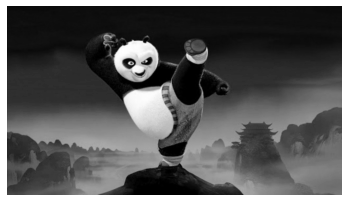

In [8]:
print('Преобразованное изображение в градации серого:')
show_image(gray_img)

In [9]:
GRADIENT_X = convolution(gray_img, np.array([[-1], [1]]))
GRADIENT_Y = convolution(gray_img, np.array([[-1, 1]]))
gradient_image = (np.fabs(GRADIENT_X) + np.fabs(GRADIENT_Y)).astype(np.int8)

In [10]:
gradient_image.shape

(720, 1280)

Контуры изображения методом градиента:


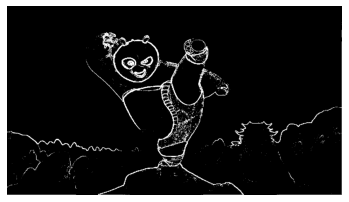

In [11]:
print('Контуры изображения методом градиента:')
show_image(threshold_processing(gradient_image, 15))

# Задание 3.

Сделать выделение контуров методом по вариантам.

In [12]:
def sobel_operator(image, kernel):
    """Оператор Собеля."""
    image_rows, image_cols = image.shape
    output_image = np.zeros((image_rows, image_cols))

    X = convolution(image, kernel)
    Y = convolution(image, np.flip(kernel.T, axis=0))

    output_image = np.sqrt(np.square(X) + np.square(Y))

    return output_image

Преобразованное изображение в градации серого:


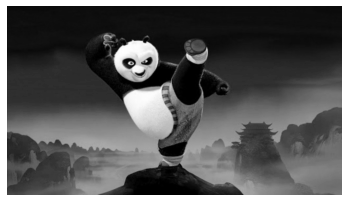

In [13]:
print('Преобразованное изображение в градации серого:')
show_image(gray_img)

оператора Собеля:


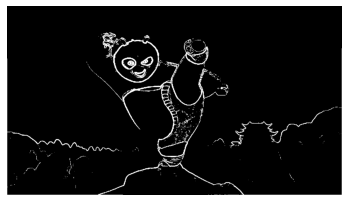

In [14]:
kernel = np.array([
    [-1, -2, -1],
    [0,  0,  0],
    [1,  2,  1],
])

sobel_image = sobel_operator(gray_img, kernel)
print('оператора Собеля:')
show_image(threshold_processing(sobel_image, 100))

# Задание 4.

Сделать выделение контуров методом с согласованием. Тип функции аппроксимации и размер окна указан по вариантам.

Преобразованное изображение в градации серого:


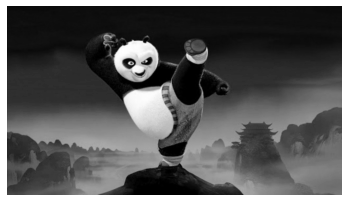

In [15]:
print('Преобразованное изображение в градации серого:')
show_image(gray_img)

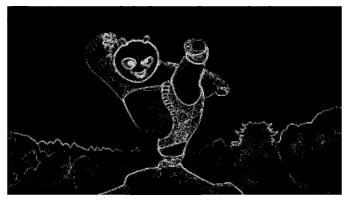

In [16]:
kernel = 1 / 3 * np.array([
    [2, -1,  2],
    [-1, -4, -1],
    [2, -1,  2]
])

print('Изображение, которое получено в результате метода согласованием:')
consistent_image = np.fabs(convolution(gray_img, kernel))
show_image(threshold_processing(consistent_image, 10))

Теория была взята из методического пособия: "Методы повышения качества, фильтрации и восстановления изображений" (Н.И. Глумов, В.В. Мясников, В.В. Сергеев, В.А. Сойфер, А.В. Чернов)

Ссылка: http://repo.ssau.ru/handle/Uchebnye-posobiya/Metody-povysheniya-kachestva-filtracii-i-vosstanovleniya-izobrazhenii-Elektronnyi-resurs-elektron-ucheb-posobie-54660